In [1]:
%matplotlib notebook

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
plt.ioff()

import seaborn as sns
sns.set()

from regressors.polynomial import PolynomialRegressor, XYPair

### Data Generation

In [3]:
n_samples = 1000
x_dom = 20

In [4]:
X = np.zeros((n_samples, 2))
X.T[0] = np.linspace(-x_dom, x_dom, n_samples)
X.T[1] = np.sin(np.linspace(-x_dom, x_dom, n_samples))

E = np.random.random(n_samples) - 0.5

Y = ((X.T[0] + X.T[1] + E) * ((X.T[0] + X.T[1] + E) - x_dom) * ((X.T[0] + X.T[1] + E) + x_dom)).reshape(n_samples, 1)
Y_upper_bound = ((X.T[0] + X.T[1] + 0.5) * ((X.T[0] + X.T[1] + 0.5) - x_dom) * ((X.T[0] + X.T[1] + 0.5) + x_dom)).reshape(n_samples, 1)
Y_lower_bound = ((X.T[0] + X.T[1] - 0.5) * ((X.T[0] + X.T[1] - 0.5) - x_dom) * ((X.T[0] + X.T[1] - 0.5) + x_dom)).reshape(n_samples, 1)

In [5]:
np.save('../data/X', X)
np.save('../data/Y', Y)

np.save('../data/E', E)
np.save('../data/Y_upper_bound', Y_upper_bound)
np.save('../data/Y_lower_bound', Y_lower_bound)

<IPython.core.display.Javascript object>


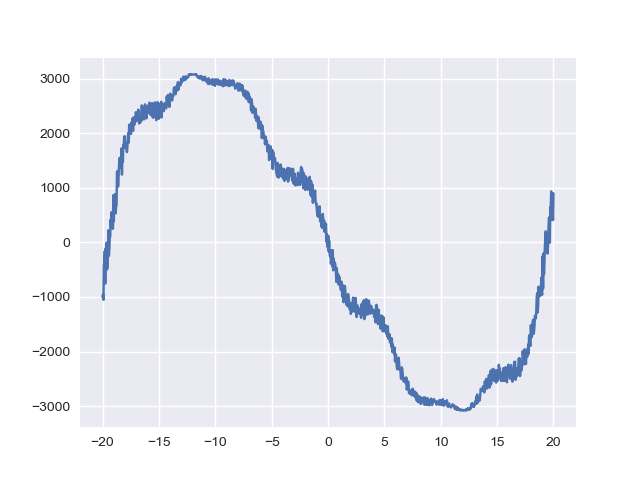

In [6]:
plt.plot(X.T[0], Y)
plt.show()

### Polynomial Regression

In [7]:
model = PolynomialRegressor(test_degrees=30, eps=0.01, early_stopping=True, patience=3)

In [8]:
model.fit(XYPair(np.linspace(-x_dom, x_dom, n_samples).reshape(n_samples, 1), Y), verbose=1)

degree: 0  ||  r_sqaured: 2.220446049250313e-16
degree: 1  ||  r_sqaured: 0.6839972757489855
degree: 2  ||  r_sqaured: 0.683997385268257
degree: 3  ||  r_sqaured: 0.9862348460075676
degree: 4  ||  r_sqaured: 0.986235671435399
degree: 5  ||  r_sqaured: 0.9870354466103637
degree: 6  ||  r_sqaured: 0.9870355069167193
best_degree: 3  ||  best_r_squared: 0.9862348460075676

degree: 3  ||  r_sqaured: 0.9862348460075676


In [9]:
model.degree

3

In [10]:
model.coefs

array([[  2.54710091e+00,  -4.00708932e+02,   6.14702020e-03,
          1.00587434e+00]])

In [11]:
model.labels

['1', 'x0', 'x0^2', 'x0^3']

In [12]:
model.func

[(2.5471009087051684, '1'),
 (-400.7089323689591, 'x0'),
 (0.0061470202024906939, 'x0^2'),
 (1.0058743354834112, 'x0^3')]

In [13]:
model.print_func()

2.547101*1 + -400.708932*x0 + 0.006147*x0^2 + 1.005874*x0^3


<IPython.core.display.Javascript object>


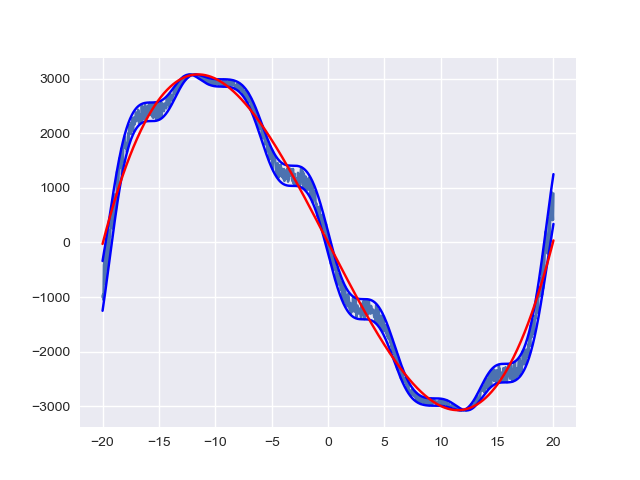

In [14]:
plt.plot(X.T[0], Y)
plt.plot(X.T[0], Y_upper_bound, c='b')
plt.plot(X.T[0], Y_lower_bound, c='b')
plt.plot(X.T[0], model.predict(), c='r')
plt.show()

<IPython.core.display.Javascript object>


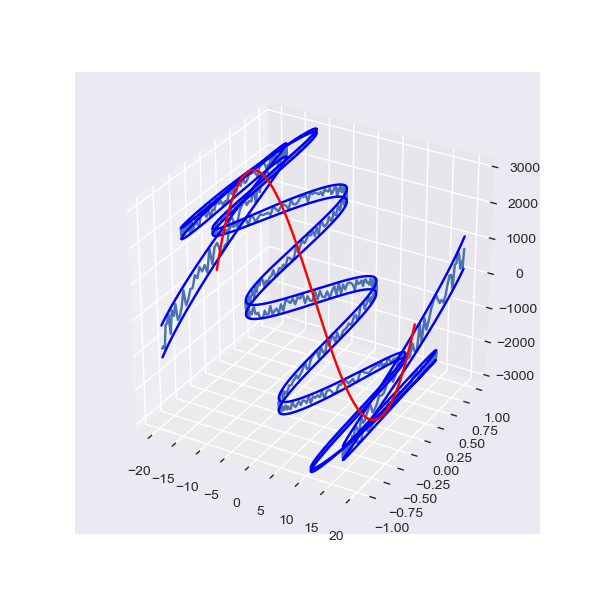

In [15]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(X.T[0], X.T[1], Y.flatten())
ax.plot(X.T[0], X.T[1], Y_upper_bound.flatten(), c='b')
ax.plot(X.T[0], X.T[1], Y_lower_bound.flatten(), c='b')
ax.plot(X.T[0], np.zeros(n_samples), model.predict().flatten(), c='r')
plt.show()